# Decision Tree
- Supervised


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets, preprocessing
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import graphviz 
from sklearn.tree import export_graphviz
import pydot


# Function to visualize a data set in 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  color=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Function to display the decision surface of a classifier
def plot_decision_region(X, pred_fun):
    print(X.shape)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Decision Tree


# Decision Trees

Following is another decision tree-based nonlinear classification algorithm. Decision trees are very intuitive, since they encode a series of choices "**if this**" or "**if not then**", much like how a person would make a decision. The great advantage of this technique is that these choices can be learned automatically from the data.

## Example

Consider the following decision tree. This decision tree describes a series of choices that seek to determine whether I wait (**V**) or not (**F**) for a table in a restaurant.

<img src = "https://drive.google.com/uc?export=view&id=1XrQiEx-PRqJDjSaoXvhh2a_YxxNlRUy0">

Based on the above decision tree, I can make the decision of whether to wait or not, using some simple classification rules, for example:

* **Yes** Clients = "Full" **AND** Estimated Wait = "10-30" **AND** Hunger = "No" **Then** Wait = "YES"
* **Yes** Clients = "Some" **Then** Wait = "YES"
* **Yes** Clients = "Full" **AND** Estimated Wait = "> 60" **Then** Wait = "NO"

## Benefits

* The input data requires very little preprocessing. Decision trees can work with variables of different types (continuous and variable) and are invariant to the scaling of the characteristics.
* Models are easy to interpret, trees can be viewed.
* The computational cost of using the tree to predict the category of an example is minimal compared to other techniques (logarithmic time).

## Cons

* It can be so complex that the data set is memorized, therefore it does not generalize as well (**Overfit**).
* They are very sensitive to class imbalance (**Bias**).

### Gini index

$$\sum_{j} P_j ^2$$

- Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
- It means an attribute with lower gini index should be preferred.
- Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.

### Entropy

$$ H(x) = \sum_{i = 1}^N p(x_i) \log_{2} p(x_i) $$

- Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

<img src="https://media.licdn.com/dms/image/C5612AQE3xxXSwWO7tA/article-inline_image-shrink_1000_1488/0?e=2124662400&v=beta&t=nIUfCaHTqjQdCPg9SANAiCDn4vUlR6WODHyDF_l7iAE">

## How is the tree built? - Basic algorithm
* The tree is built recursively from top to bottom in a divided way and you will win.
* At the beginning, all the training examples are at the root.
* Attributes are categorical (in case of continuous attributes, they are discretized in advance)
* The examples are recursively distributed according to the selected attribute.
* Test attributes are selected based on a heuristic or statistical measure (eg **information gain**)
* Stops until there are only examples of one class in each leaf node or maximum depth has been reached.

## How to select an attribute? How to measure if a partition is good?

An ideal partition is one that divides samples of the same class into a node. Let's see what happens if we use the variable **Client** to partition our dataset.

<img src = "https://drive.google.com/uc?export=view&id=1gXyErBV3z1pUa9Gh2ax0AB1O1_0aHBR2">

Now let's look at what happens when we partition the dataset using the variable **Type of restaurant**.

<img src = "https://drive.google.com/uc?export=view&id=18wDWMDaDBY_N2PF_uPr-oV-PDTNV0wSm">

**Which variable is better?**

## Scikit-Learn implementation

Scikit-Learn implementation is achieved with the `DecisionTreeClassifier` class.

In [2]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

We reload our dataset using IRIS.

In [3]:
iris = datasets.load_iris()
X = iris.data[:,[0, 2]] 
y = iris.target

`DecisionTreeClassifier` supports several parameters such as:
* `max_depth`: Maximum tree depth.
* `criterion`: Measure to determine the quality of the partitioning generated by an attribute. Supports GINI coefficient and entropy.
* `min_samples_split`: Controls the minimum number of samples that must be in a node after a partition.
* `min_samples_leaf`: Controls the minimum number of samples that must be in a leaf node.

In [4]:
classifier.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [5]:
classifier = classifier.fit(X, y)

We visualize the decision surface of the classifier

(150, 2)


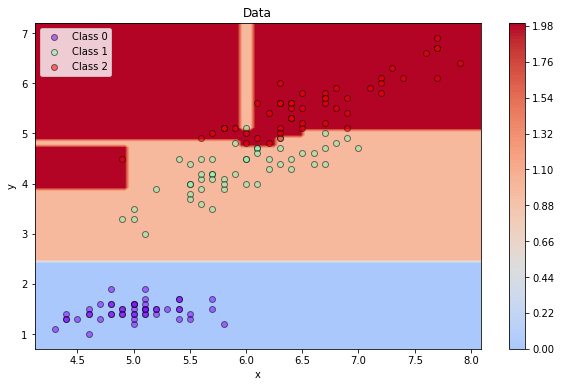

In [6]:
pl.figure(figsize = (10, 6))    
plot_decision_region(X, gen_pred_fun(classifier))
plot_data(X, y)

In [7]:
print('Error: {}'.format(1-classifier.score(X, y)))

Error: 0.00666666666666671


## Visualization

The learned decision tree can be viewed using `graphviz`. In Ubuntu, it is recommended to install it using both lines:
* `conda install graphviz`
* `sudo apt-get install graphviz`
* `windows` - [Link](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)

Next, we are going to use the entire IRIS dataset (Using all four characteristics) and train a decision tree.

In [8]:
X = iris.data
y = iris.target

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X, y)

We use `graphviz` to display the generated tree. `graphviz` supports class and feature names as parameters

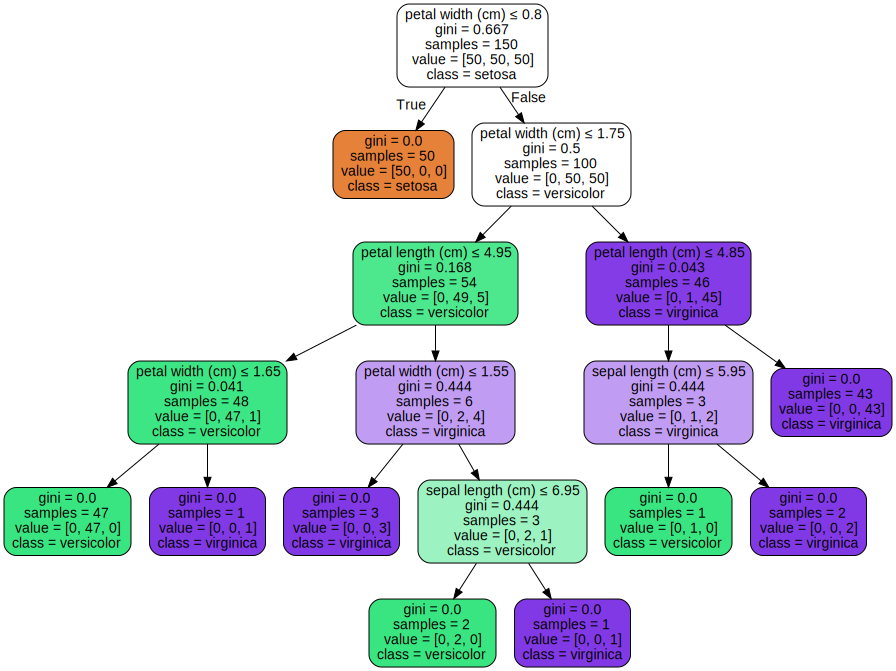

In [9]:
from IPython.display import SVG
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin' # Windows

dot_data = export_graphviz(classifier, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

## Importance of variables

One of the advantages of using decision trees is that it allows us to determine the importance of each characteristic, based on the impurity index used. Scikit-Learn allows us to access the importance of each feature by calling `.feature_importances_`. This importance quantifies how much each characteristic contributes to improving tree performance.

In [10]:
classifier.feature_importances_

array([0.02666667, 0.        , 0.05072262, 0.92261071])

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Assessing complexity using `DecisionTreeClassifier`

To assess complexity, we are going to estimate the optimal depth of the tree.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=1234,
                                                    stratify=y)

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

We will explore the following maximum depth values:
* $ [1, 2, 3, \dots, 20] $

In [14]:
train_error = []
generalization_error = []
max_depth_values = list(range(1, 21, 1))

for depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)
    train_error.append(1 - decision_tree.score(X_train, y_train))
    generalization_error.append(1 - decision_tree.score(X_test, y_test))

We visualize the training error curve against generalization error

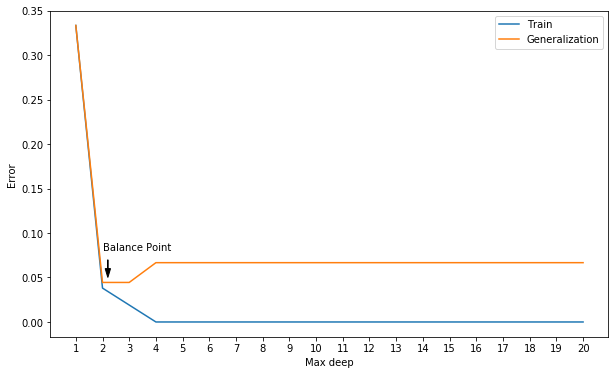

In [15]:
pl.figure(figsize = (10, 6))

pl.plot(max_depth_values, train_error, label="Train")
pl.plot(max_depth_values, generalization_error, label="Generalization")
pl.xticks(max_depth_values)
pl.xlabel("Max deep")
pl.ylabel("Error")
pl.arrow(2.2, 0.07, 0, -0.01, head_width=0.2, head_length=0.01, fc='k', ec='k')
pl.text(2, 0.08, 'Balance Point')
pl.legend();

# Other Example

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


In [16]:
df = pd.read_csv("../Datasets/Week8/drug200.csv", delimiter=",")

In [17]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY



<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

In [18]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In some cases, some characteristics of our dataset are categorical, such as __Sex__ or __BP__. Unfortunately, Sklearn's decision trees are not capable of handling categorical variables. But we can still convert these characteristics into numerical values. __pandas.get_dummies ()__
Convert the categorical variable to dummy / indicator variables.

In [19]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [20]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [22]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
drugTree.feature_importances_

array([0.09749785, 0.        , 0.3295848 , 0.05454991, 0.51836744])

In [25]:
predTree = drugTree.predict(x_test)

In [26]:
print (predTree [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [27]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


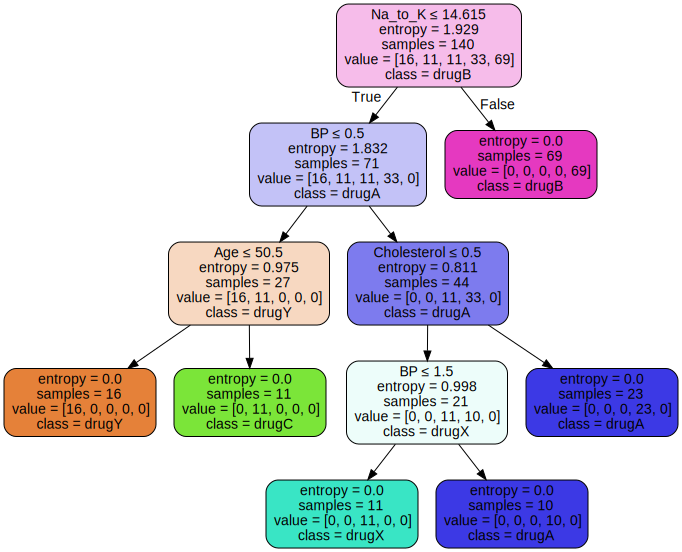

In [28]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()


dot_data = export_graphviz(drugTree, out_file=None, 
                         feature_names=featureNames,  
                         class_names=targetNames,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))


In [29]:
drugTree.predict([[47, 1, 1, 0, 10.4]])

array(['drugC'], dtype=object)

# Other Example

- $0$ = Dead
- $1$ = Survived

In [30]:
import seaborn as sns
import re
sns.set()

train_df = pd.read_csv('../Datasets/Week8/titanic-train.csv')
test_df = pd.read_csv('../Datasets/Week8/titanic-test.csv')

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Text(0.5, 1.0, 'Gender')

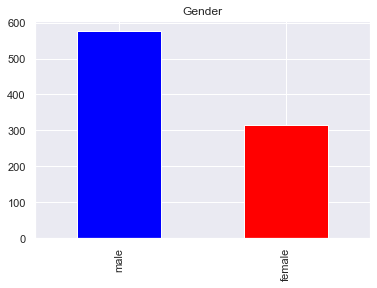

In [35]:
train_df.Sex.value_counts().plot(kind='bar', color=['blue','red'])
plt.title('Gender')


In [36]:
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])

In [37]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [38]:
t_predict = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

c_cols = [name for name in t_predict.columns if 
             t_predict[name].nunique() < 10 and
             t_predict[name].dtype == 'object'
         ]

In [39]:
n_cols = [name for name in t_predict.columns if 
             t_predict[name].dtype in ['int64', 'float64']
         ]

In [40]:
t_cols = c_cols + n_cols 

t_predict = t_predict[t_cols]

In [41]:
dummy_econded_train_predictors = pd.get_dummies(t_predict)

In [42]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [43]:
y = train_df['Survived'].values
x = dummy_econded_train_predictors.values


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=1)

In [45]:
tree= DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)

In [46]:
tree_accuracy = round(tree.score(x_test, y_test), 4)
tree_accuracy

0.7489

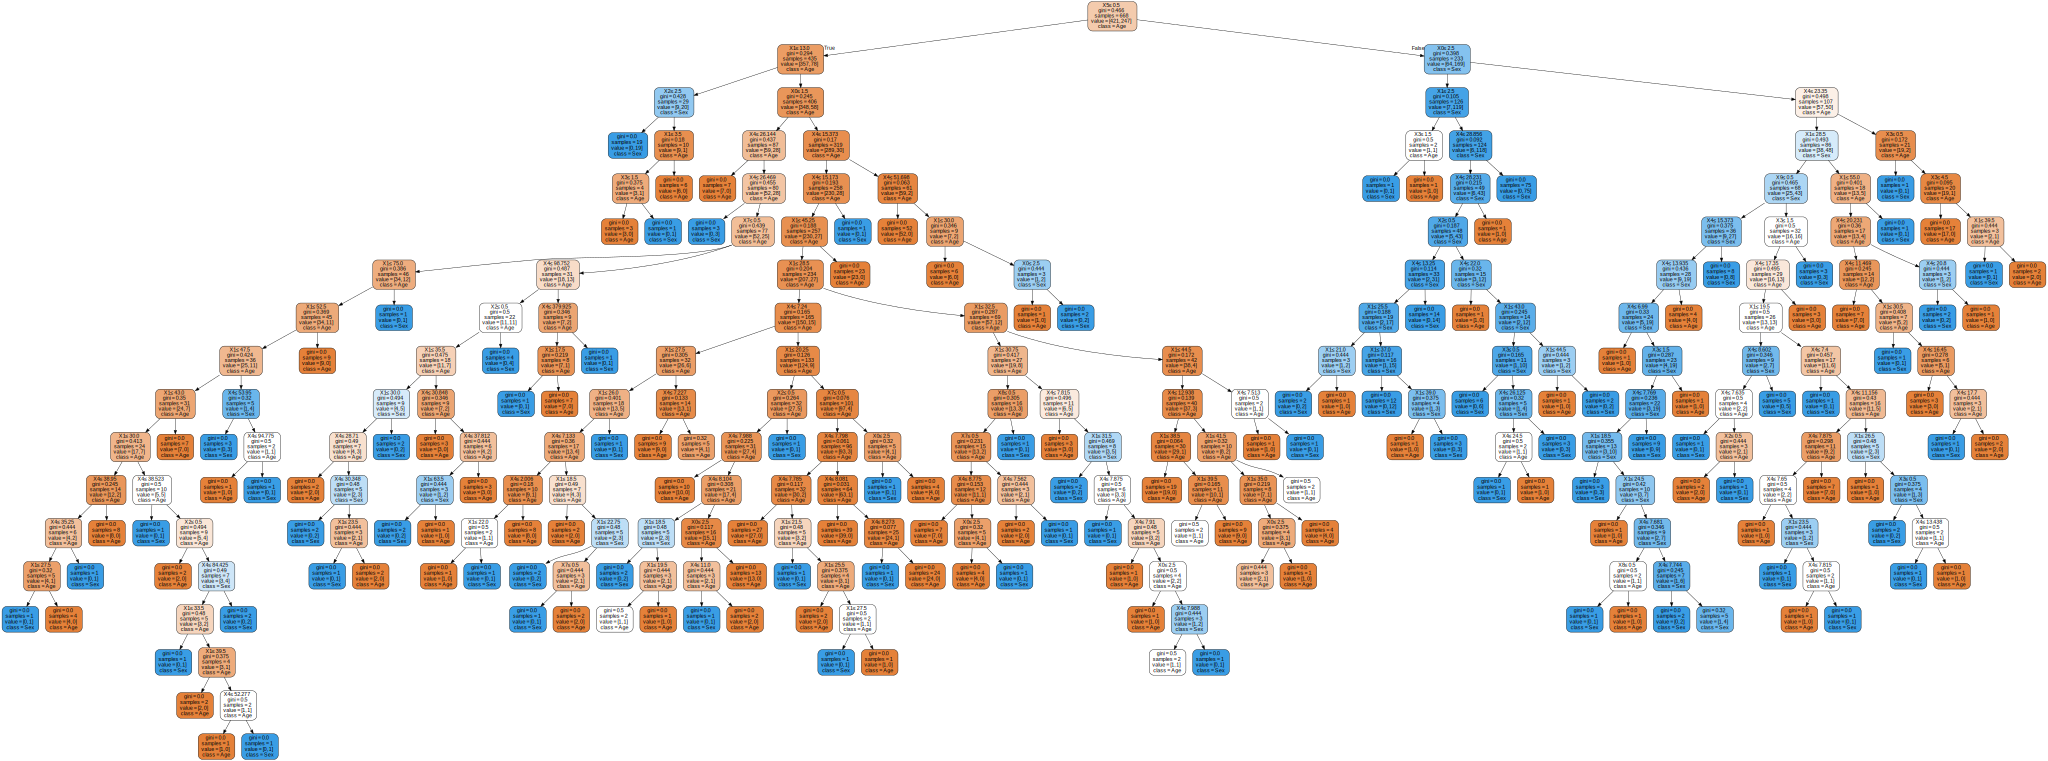

In [47]:
import pydotplus
dot_data = StringIO()
filename = "TitanicTree.png"
targetNames = df.columns.tolist()


dot_data = export_graphviz(tree, out_file=None, 
                         class_names=targetNames,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))


In [48]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png(filename)


True

## Other Example

- Balance Scale Weight & Distance Database

This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left distance, the right weight, and the right distance.  The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight).  If they are equal, it is balanced.

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)

In [49]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+'databases/balance-scale/balance-scale.data', 
                            sep= ',', header = None) 
      
# Printing the dataswet shape 
print ("Dataset Length: ", len(df)) 
print ("Dataset Shape: ", df.shape) 

print ("Dataset: ",df.head()) 

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [50]:
X = df.values[:, 1:5] 
Y = df.values[:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

In [51]:
# With max_depth = 4 -> predict = 81 %
dtc_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
dtc_gini.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [52]:
dtc_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
dtc_ent.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [53]:
def prediction_tree(X_test, clf_object): 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [54]:
y_pred_gini = prediction_tree(X_test, dtc_gini) 
cal_accuracy(y_test, y_pred_gini) 

Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix: 
 [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


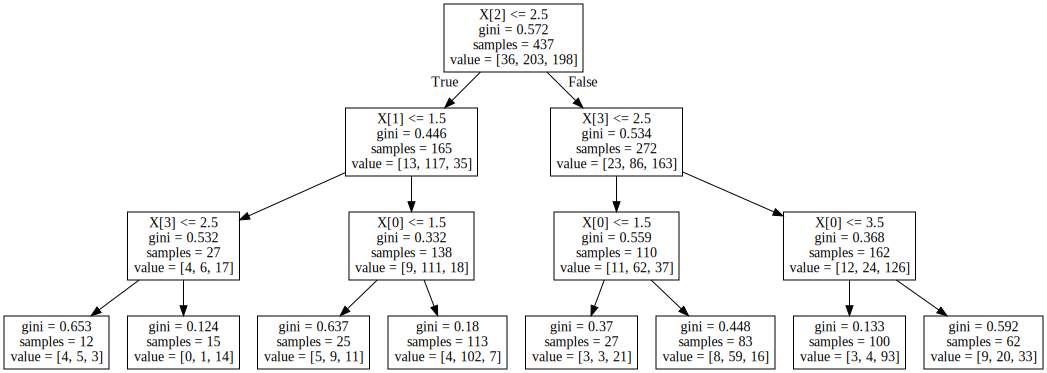

In [55]:
dot_data = StringIO()
filename = "gini.png"

dot_data = export_graphviz(dtc_gini)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [56]:
y_pred_entropy = prediction_tree(X_test, dtc_ent) 
cal_accuracy(y_test, y_pred_entropy) 

Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix: 
 [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


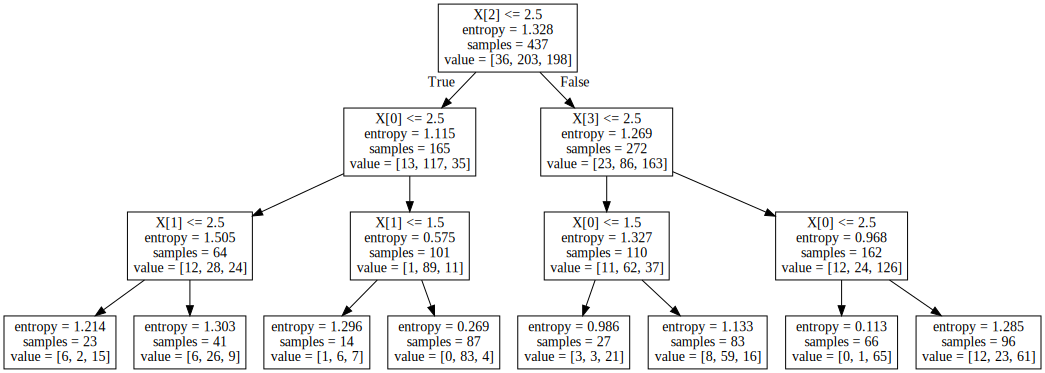

In [57]:
dot_data = StringIO()
filename = "entropy.png"

dot_data = export_graphviz(dtc_ent)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

### Other Dataset

In [58]:
df = pd.DataFrame({"toothed":[1,1,1,0,1,1,1,1,1,0],
                     "hair":[1,1,0,1,1,1,0,0,1,0],
                     "breathes":[1,1,1,1,1,1,0,1,1,1],
                     "legs":[1,1,0,1,1,1,0,0,1,1],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

features = df[["toothed","hair","breathes","legs"]]
target = df["species"]

df

,toothed,hair,breathes,legs,species
0,1,1,1,1,Mammal
1,1,1,1,1,Mammal
2,1,0,1,0,Reptile
3,0,1,1,1,Mammal
4,1,1,1,1,Mammal
5,1,1,1,1,Mammal
6,1,0,0,0,Reptile
7,1,0,1,0,Reptile
8,1,1,1,1,Mammal
9,0,0,1,1,Reptile


In [59]:
X = df.values[:, 0:4] 
Y = df.values[:, 4] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 

In [60]:
dtc = DecisionTreeClassifier() 
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
y_pred = prediction_tree(X_test, dtc) 
cal_accuracy(y_test, y_pred) 

Predicted values:
['Reptile' 'Mammal' 'Reptile']
Confusion Matrix: 
 [[1 0]
 [0 2]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         1
     Reptile       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



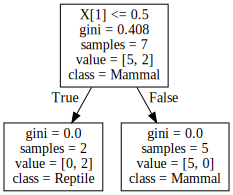

In [62]:
dot_data = StringIO()
filename = "entropy.png"
x = df['species'].unique().tolist()

dot_data = export_graphviz(dtc, class_names=x)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [63]:
y_pred = prediction_tree([[1,1,1,1],[1,0,1,0]], dtc)

Predicted values:
['Mammal' 'Reptile']


### Other Dataset

A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)

In [64]:
df = pd.read_csv('../Datasets/Week8/zoo.data', sep= ',', names=['animal_name','hair','feathers','eggs','milk',
                                             'airbone','aquatic','predator','toothed','backbone',
                                             'breathes','venomous','fins','legs','tail','domestic','catsize','class',])

In [65]:
df.head()

,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [66]:
df.shape

(101, 18)

In [67]:
#le = preprocessing.LabelEncoder()
#le.fit(df['animal_name'])
#list(le.classes_)
#df["animal_name_code"] = le.fit_transform(df["animal_name"])
#df.head()

In [68]:
X = df.values[:, 1:17] 
Y = df['animal_name'].values 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 

In [69]:
dtc_zoo = DecisionTreeClassifier(criterion = 'entropy') 
dtc_zoo.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

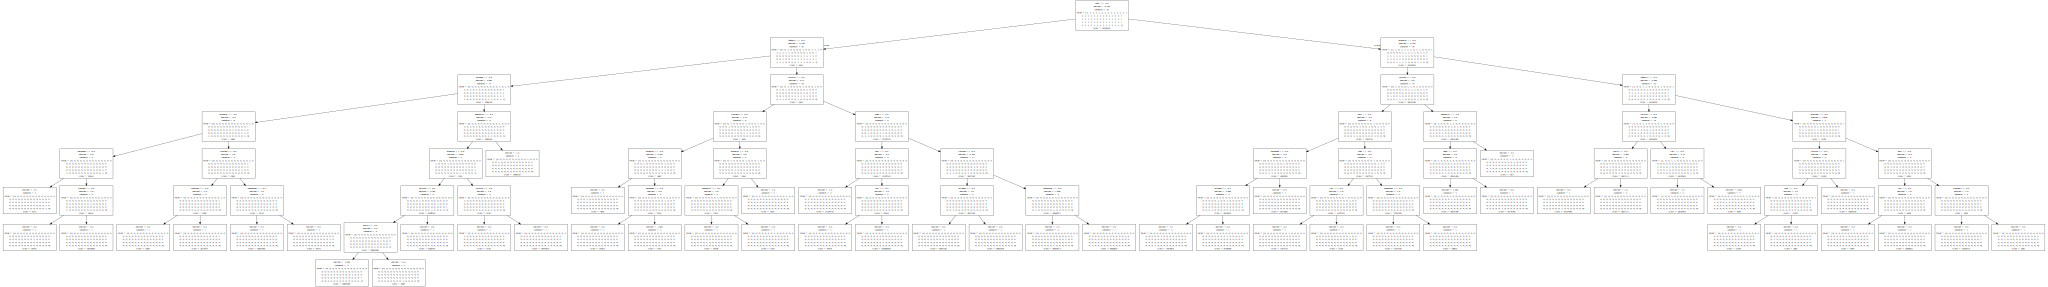

In [70]:
dot_data = StringIO()
filename = "zoo.png"
feature = df['animal_name'].unique().tolist()
x = df.drop(['animal_name', 'class'], 1)
targetNames = x.columns.tolist()

dot_data = export_graphviz(dtc_zoo, feature_names=targetNames, class_names=feature)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [71]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png(filename)

True

In [72]:
y_pred = dtc_zoo.predict(X_test)
y_pred

array(['squirrel', 'wasp', 'vampire', 'hamster', 'bass', 'tuatara',
       'boar', 'seahorse', 'boar', 'bass', 'crow', 'antelope', 'squirrel',
       'lobster', 'tuatara', 'boar', 'slowworm', 'hamster', 'chicken',
       'frog', 'crab', 'boar', 'bass', 'pike', 'pheasant', 'antelope',
       'bass', 'antelope', 'kiwi', 'seahorse', 'housefly'], dtype=object)

In [73]:
y_test

array(['wallaby', 'honeybee', 'fruitbat', 'hare', 'piranha', 'ladybird',
       'lion', 'sole', 'puma', 'seasnake', 'hawk', 'elephant', 'gorilla',
       'crayfish', 'scorpion', 'pussycat', 'girl', 'vole', 'parakeet',
       'frog', 'starfish', 'lynx', 'herring', 'dogfish', 'lark', 'oryx',
       'catfish', 'deer', 'rhea', 'haddock', 'moth'], dtype=object)

In [74]:
dtc_zoo.score(X_test, y_test)

0.03225806451612903

In [75]:
df = pd.read_csv('../Datasets/Week8/zoo.data', sep= ',', names=['animal_name','hair','feathers','eggs','milk',
                                             'airbone','aquatic','predator','toothed','backbone',
                                             'breathes','venomous','fins','legs','tail','domestic','catsize','class',])


In [76]:
df = df.drop(['class'], 1)
df.head()

,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [77]:
animal_list = df['animal_name'].unique().tolist()

In [78]:
le = preprocessing.LabelEncoder()
le.fit(df['animal_name'])

LabelEncoder()

In [79]:
df["animal_name"] = le.fit_transform(df["animal_name"])
df.head()

,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [80]:
#list(le.classes_)
#df.head()

In [81]:
X = df.values[:, 1:] 
Y = df['animal_name'].values 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 

In [82]:
dtc_zoo = DecisionTreeClassifier(criterion = 'entropy').fit(X,Y)

In [83]:
y_pred = dtc_zoo.predict(X_test)
y_pred

array([ 2, 35, 19, 24, 80, 16, 11, 57, 34, 41, 95,  4,  2,  1, 33, 18,  6,
       11, 47, 52, 42, 42, 84, 31, 80, 33, 39, 61,  4, 15, 48])

In [84]:
y_test

array([ 2, 93, 65, 24, 80, 16, 56, 57, 34, 41, 95, 63,  8, 17, 72, 59,  6,
       11, 47, 52, 58, 82, 84, 31, 98, 33, 50, 61, 49, 45, 53])

In [85]:
dtc_zoo.score(X_test,y_pred)

1.0

In [86]:
list(le.inverse_transform(y_pred))

['bass',
 'hare',
 'dolphin',
 'flea',
 'slug',
 'crow',
 'chicken',
 'penguin',
 'hamster',
 'ladybird',
 'wallaby',
 'boar',
 'bass',
 'antelope',
 'haddock',
 'dogfish',
 'calf',
 'chicken',
 'mink',
 'octopus',
 'lark',
 'lark',
 'starfish',
 'gorilla',
 'slug',
 'haddock',
 'housefly',
 'pitviper',
 'boar',
 'crayfish',
 'mole']

In [87]:
df = pd.read_csv('../Datasets/Week8/zoo.data', sep= ',', names=['animal_name','hair','feathers','eggs','milk',
                                             'airbone','aquatic','predator','toothed','backbone',
                                             'breathes','venomous','fins','legs','tail','domestic','catsize','class',])

In [88]:
df = df.drop(['animal_name'], 1)
df.head()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [89]:
X = df.values[:, 1:17] 
Y = df['class'].values 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 

In [90]:
dtc_zoo = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

In [91]:
y_pred = prediction_tree(X_test, dtc_zoo) 
cal_accuracy(y_test, y_pred) 

Predicted values:
[1 1 1 2 1 2 1 6 5 7 6 4 2 3 1 3 1 6 1 1 1 1 1 1 2 4 4 1 2 7 1]
Confusion Matrix: 
 [[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



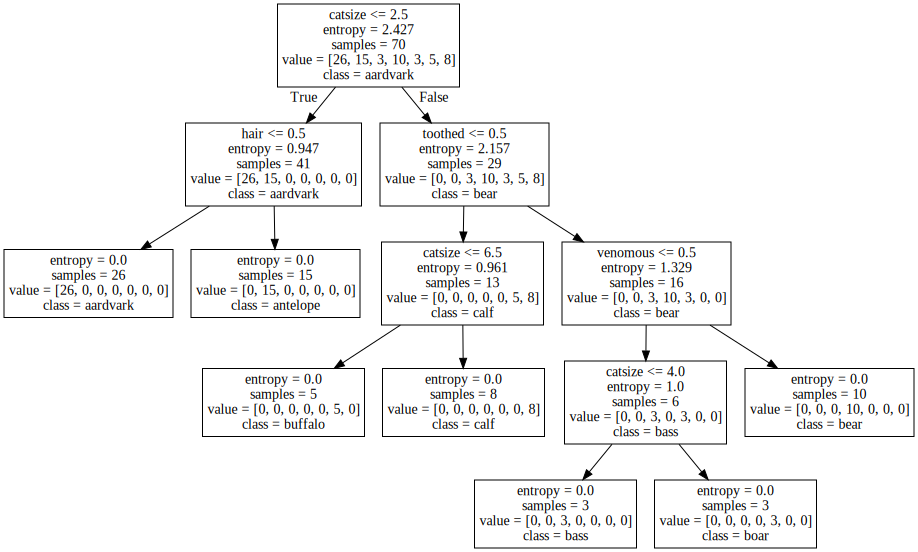

In [92]:
dot_data = StringIO()
filename = "zoo.png"
feature = animal_list
targetNames = x.columns.tolist()

dot_data = export_graphviz(dtc_zoo, feature_names=targetNames, class_names=feature)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [93]:
df = pd.read_csv('../Datasets/Week8/zoo.data', sep= ',', names=['animal_name','hair','feathers','eggs','milk',
                                             'airbone','aquatic','predator','toothed','backbone',
                                             'breathes','venomous','fins','legs','tail','domestic','catsize','class',])

dataset = df.drop('animal_name',axis=1)
x_train = dataset.iloc[:80,:-1]
x_test = dataset.iloc[80:,:-1]
y_train = dataset.iloc[:80,-1]
y_test = dataset.iloc[80:,-1]

In [94]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)
prediction = tree.predict(x_test)
print("The prediction accuracy is: ",tree.score(x_test,y_test))

The prediction accuracy is:  0.8095238095238095


### Other Example

In [95]:
df = pd.read_csv('../Datasets/Week7/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
x = df.drop(['Outcome'],1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [97]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [98]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [99]:
dtc_diabetes = DecisionTreeClassifier().fit(x, y)

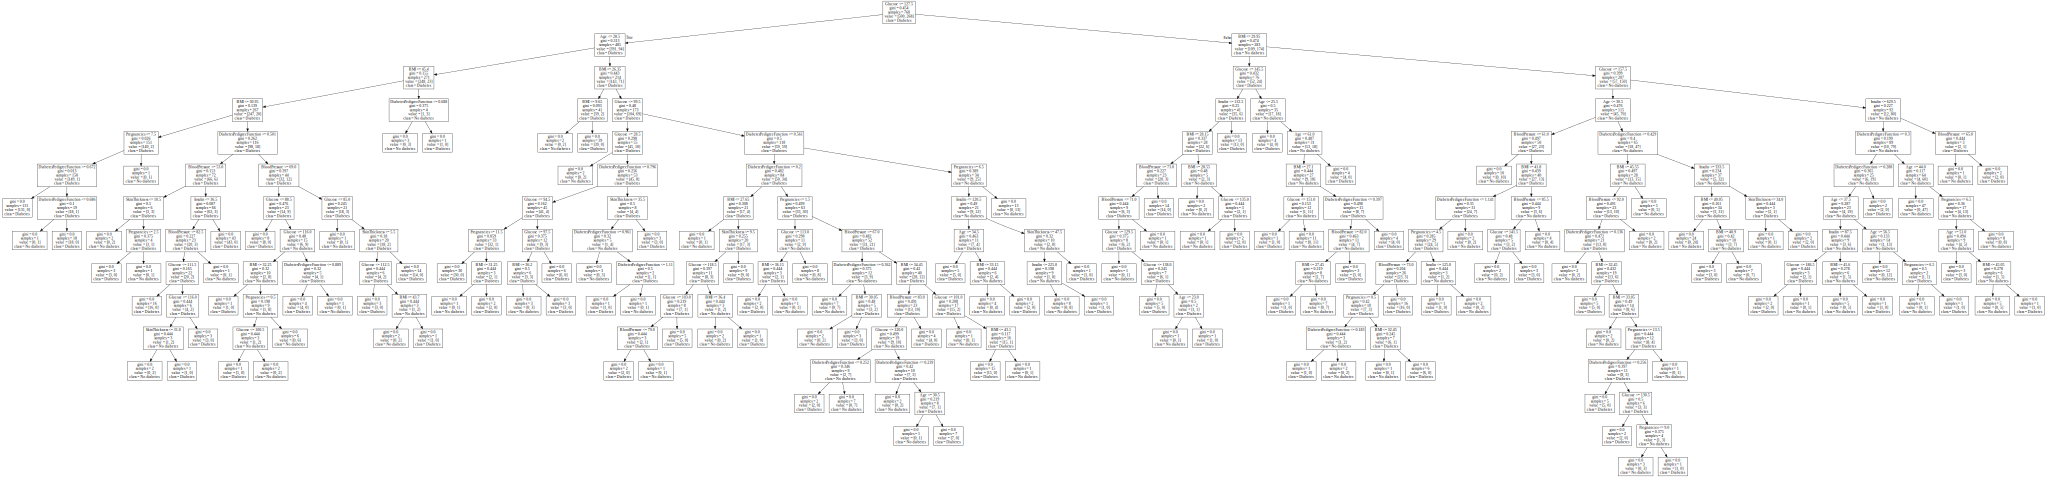

In [100]:
dot_data = StringIO()
filename = "diabetes.png"
feature = ['Diabetes','No diabetes']
x = df.drop(['Outcome'],1)
targetNames = x.columns.tolist()

dot_data = export_graphviz(dtc_diabetes, feature_names=targetNames, class_names=feature)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [101]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png(filename)

True

In [102]:
dtc_diabetes.score(x_test,y_test)

1.0